In [76]:
import requests
from bs4 import BeautifulSoup
import json
import types
from os import listdir
from os.path import isfile, join
from unidecode import unidecode
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np

In [77]:
import itertools
import collections
import json
import pickle
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
#### Repetition of words used in lyrics
# From observing wordcloud on '4_lyricAnalysis', it was possible to take a glimpse of trends 
# reciding in lyrics by the comparison of text analysis according to the most popular artist for each yeaqr
# using NLTK, more quantifiable approach will be taken. 
# More specifically, Lexical diversity column for each song will be used. 
# Lexical diversity is a measure of how many different words that are used in a text, while lexical density provides a measure of the proportion of lexical items (i.e. nouns, verbs, adjectives and some adverbs) in the text.

# Resource: https://en.wikipedia.org/wiki/Lexical_diversity
# Resource: https://textinspector.com/help/?page_id=136

In [79]:
DATA_PATH = '../data/'
fname = DATA_PATH + 'billboard_1970_current.csv'
df = pd.read_csv(fname,sep='@')

In [80]:
## Start with cleaning lyrics
df = df[pd.isnull(df.lyric)==False]
df = df[df.lyric!='no lyrics']

In [81]:
# make an array containing word count & unique word count of each song
wordcount_uniq_list=[]
wordcount_list=[]
lexical_diversity_list=[]
counter=0
for song in df.iterrows():
    wordcount_list.append(len(nltk.word_tokenize(song[1]['lyric'])))
    wordcount_uniq_list.append(len(set(nltk.word_tokenize(song[1]['lyric']))))

#### Resource: http://www.nltk.org/book/ch01.html


In [82]:
def lexical_diversity(wordcount_list, wordcount_uniq_list):
    return np.array(wordcount_uniq_list)/np.array(wordcount_list)

In [83]:
l = lexical_diversity(wordcount_list, wordcount_uniq_list)

In [84]:
df['lexdiv']=np.array(wordcount_uniq_list)/np.array(wordcount_list)

In [85]:
lexical_diversity_score = lexical_diversity(wordcount_list, wordcount_uniq_list)

df['wordcount']=wordcount_list
df['wordset']=wordcount_uniq_list
# lexdivs= lexical_diversity(wordcount_list, wordcount_uniq_list)
# np.array(wordcount_uniq_list)/np.array(wordcount_list)

df['lexical_diversity']= lexical_diversity_score
df['rept_score']= 1/lexical_diversity_score


In [86]:
import seaborn as sns
from scipy.stats import linregress

In [87]:
def plotDesign(attribute,plot_year,plot_decade, title):
    x, y = zip(*plot_year.items())
    x_dec, y_dec = zip(*plot_decade.items())
    print("Linear regression slope:", linregress(x,y).slope)
    fig, ax = plt.subplots()
    ax.plot(x_dec,y_dec,color='red',linewidth=2)

    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit) 

    # https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
    plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

    ax.set(xlabel='Year', ylabel=str(attribute),title = title)
    ax.set_facecolor("white")
    ax.set_clip_on(False)

In [88]:
def plot(df_in, attribute, title):
    years=df_in.groupby('year')
    year_lex= dict()
    for year in years:
        year_lex[year[0]]= year[1][attribute].mean()
    plot_year = collections.OrderedDict(sorted(year_lex.items())) 
    
    decades=df.groupby('decade')
    decade_lex = dict()
    for decade in decades:
        decade_lex[decade[0]] = decade[1][attribute].mean()
    plot_decade = collections.OrderedDict(sorted(decade_lex.items())) 

    plotDesign(attribute,plot_year, plot_decade, title)    

In [89]:
## Heading Word repetition analysis
# Green dot: trend over each year
# Red line: trend over dacades
# Black dotted line: Linear regression 

Linear regression slope: 6.68811020128


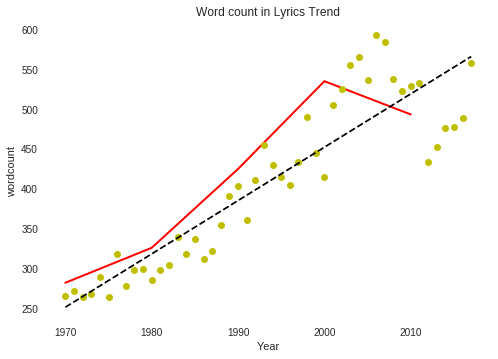

In [90]:
plot(df,'wordcount',"Word count in Lyrics Trend")

Linear regression slope: 1.65817777809


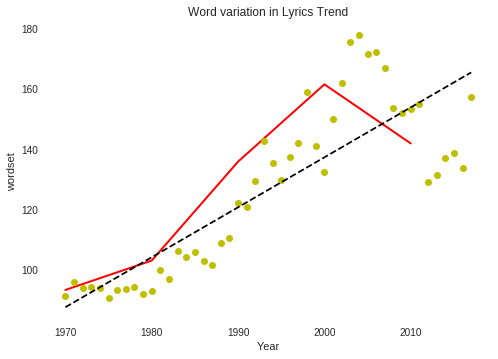

In [91]:
plot(df,'wordset',"Word variation in Lyrics Trend")


Linear regression slope: -0.00167767620016


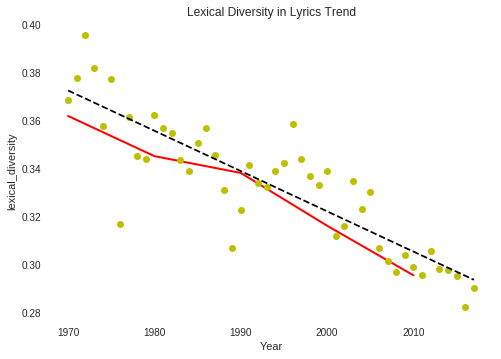

In [92]:
plot(df,'lexical_diversity',"Lexical Diversity in Lyrics Trend")


Linear regression slope: 0.0124442097473


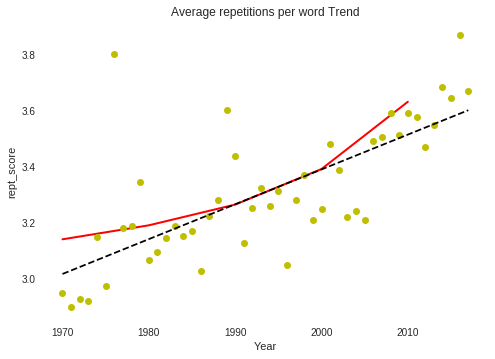

In [93]:
plot(df,'rept_score',"Average repetitions per word Trend")

In [71]:
display(df.sort(columns='rept_score',ascending=True))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,position,year,title,artist,lyric,decade,rept_score,wordcount,wordset,lexical_diversity
1211,12,1982,Chariots Of Fire,Vangelis,"was a April 24, 2012",1980,1.000000,6,6,1.000000
2063,64,1990,Free Fallin',Tom Petty,was a,1990,1.000000,2,2,1.000000
820,21,1978,Feels So Good,Chuck Mangione,was a,1970,1.000000,2,2,1.000000
1754,55,1987,Songbird,Kenny G,was a,1980,1.000000,2,2,1.000000
550,51,1975,Dynomite,Bazuka,was a,1970,1.000000,2,2,1.000000
389,90,1973,Also Sprach Zarathustra (2001),Deodato,was a,1970,1.000000,2,2,1.000000
315,16,1973,Frankenstein,Edgar Winter Group,"December 17, 2008 was a",1970,1.000000,6,6,1.000000
948,49,1979,Music Box Dancer,Frank Mills,was a,1970,1.000000,2,2,1.000000
966,67,1979,Renegade,Styx,"August 17, 2008 was a",1970,1.000000,6,6,1.000000
979,80,1979,Rise,Herb Alpert,was a,1970,1.000000,2,2,1.000000


In [94]:
df_rept = df[['position','year','decade','title','artist','lyric','rept_score']]
df_rept.to_csv(DATA_PATH+"billboard_1970_current_rept.csv", sep='@') 